In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d

In [12]:
df = pd.read_excel('250110_BMED_train data_v1.xlsx',sheet_name='Sheet2')
df[df['exp']==20]

,exp,T,V,E,Ci,Ki,t,SEC,JLA,CF_LA,...,CF_K,CA_K,CB_K,VF,VA,VB,NF_LA,NA_LA,NF_K,NB_K
120,20,26.3,30,0.25,3.0,6.0,0.0,NaN,NaN,2.893057,...,5.268312,0.009215,0.039988,1.00,1.00,6.00,3.000000,0.000000,6.000000,0.000000
121,20,26.0,30,0.25,3.0,6.0,1.0,1.913116,122.123449,2.738909,...,4.136552,0.013755,0.119186,1.08,0.99,5.85,3.067367,-0.067367,5.087940,0.912060
122,20,26.8,30,0.25,3.0,6.0,3.0,1.348034,321.875207,2.372142,...,2.530328,0.020611,0.357907,1.08,1.03,5.80,2.656615,0.343385,3.112292,2.887708
123,20,27.4,30,0.25,3.0,6.0,4.0,1.219475,466.897375,2.335240,...,1.922648,0.022295,0.483722,0.98,1.06,5.80,2.373132,0.626868,2.145881,3.854119
124,20,27.6,30,0.25,3.0,6.0,5.0,1.070469,614.903438,2.038700,...,1.397192,0.023384,0.607582,0.88,1.15,5.85,1.860374,1.139626,1.400292,4.599708
125,20,27.0,30,0.25,3.0,6.0,6.0,0.889761,886.800104,1.701408,...,0.940736,0.024038,0.719509,0.73,1.27,5.80,1.287940,1.712060,0.782115,5.217885
126,20,26.4,30,0.25,3.0,6.0,7.0,0.785846,874.256920,1.218024,...,0.633594,0.024474,0.812147,0.57,1.39,5.90,0.719938,2.280062,0.411307,5.588693
127,20,25.7,30,0.25,3.0,6.0,8.0,0.614033,1572.360316,0.583133,...,0.264175,0.024638,0.882614,0.38,1.50,6.00,0.229782,2.770218,0.114329,5.885671


In [13]:
t = []
T = []
NF_LA = []
NF_K = []
VF = []
VA = []
VB = []
exp = []
V = []
E = []


for i in range(34):
    fla = interp1d(df[df['exp']==i+1]['t'],df[df['exp']==i+1]['NF_LA'], kind='linear')
    fk = interp1d(df[df['exp']==i+1]['t'],df[df['exp']==i+1]['NF_K'], kind='linear')
    fT = interp1d(df[df['exp']==i+1]['t'],df[df['exp']==i+1]['T'], kind='linear')
    fVF = interp1d(df[df['exp']==i+1]['t'],df[df['exp']==i+1]['VF'], kind='linear')
    fVA = interp1d(df[df['exp']==i+1]['t'],df[df['exp']==i+1]['VA'], kind='linear')
    fVB = interp1d(df[df['exp']==i+1]['t'],df[df['exp']==i+1]['VB'], kind='linear')
    tn = np.arange(0,df[df['exp']==i+1]['t'].iloc[-1],0.1)
    lan = fla(tn)
    kn = fk(tn)
    Tn = fT(tn)
    vfn = fVF(tn)
    van = fVA(tn)
    vbn = fVB(tn)
    t.append(tn)
    NF_LA.append(lan)
    NF_K.append(kn)
    T.append(Tn)
    VF.append(vfn)
    VA.append(van)
    VB.append(vbn)
    exp.append(np.ones(len(tn))*df[df['exp']==i+1]['exp'].iloc[0])
    V.append(np.ones(len(tn))*df[df['exp']==i+1]['V'].iloc[0])
    E.append(np.ones(len(tn))*df[df['exp']==i+1]['E'].iloc[0])


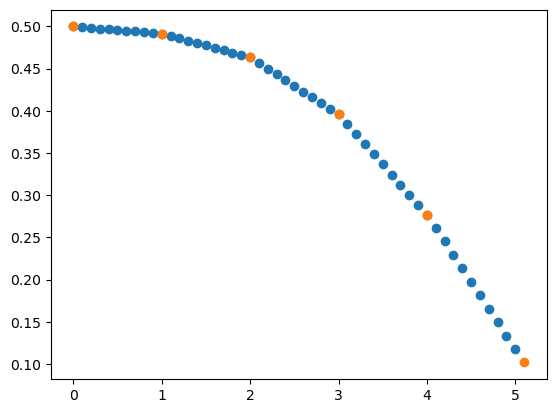

In [14]:
plt.scatter(t[0],NF_LA[0])
plt.scatter(df[df['exp']==1]['t'],df[df['exp']==1]['NF_LA'])

In [15]:
NA_LA = []
NB_K = []

for i in range(len(NF_LA)):
    nla = NF_LA[i][0] - NF_LA[i]
    nk = NF_K[i][0] - NF_K[i]
    NA_LA.append(nla)
    NB_K.append(nk)

In [16]:
dNLA = []
dNK = []
dVF = []
dVA = []
dVB = []

for i in range(len(NF_LA)):
    dnla = np.zeros(len(NF_LA[i]))
    dnk = np.zeros(len(NF_LA[i]))
    dvf = np.zeros(len(NF_LA[i]))
    dva = np.zeros(len(NF_LA[i]))
    dvb = np.zeros(len(NF_LA[i]))
    for j in range(len(NF_LA[i])):
        if j == 0:
            dnla[j] = -(-3*NF_LA[i][j]+4*NF_LA[i][j+1]-NF_LA[i][j+2])/2/(t[i][j+1] - t[i][j])
            dnk[j] = -(-3*NF_K[i][j]+4*NF_K[i][j+1]-NF_K[i][j+2])/2/(t[i][j+1] - t[i][j])
            dvf[j] = -(-3*VF[i][j]+4*VF[i][j+1]-VF[i][j+2])/2/(t[i][j+1] - t[i][j])
            dva[j] = -(-3*VA[i][j]+4*VA[i][j+1]-VA[i][j+2])/2/(t[i][j+1] - t[i][j])
            dvb[j] = -(-3*VB[i][j]+4*VB[i][j+1]-VB[i][j+2])/2/(t[i][j+1] - t[i][j])
        elif j == len(NF_LA[i])-1:
            dnla[j] = -(-3*NF_LA[i][j]+4*NF_LA[i][j-1]-NF_LA[i][j-2])/2/(t[i][j] - t[i][j-1])
            dnk[j] = -(-3*NF_K[i][j]+4*NF_K[i][j-1]-NF_K[i][j-2])/2/(t[i][j] - t[i][j-1])
            dvf[j] = -(-3*VF[i][j]+4*VF[i][j-1]-VF[i][j-2])/2/(t[i][j] - t[i][j-1])
            dva[j] = -(-3*VA[i][j]+4*VA[i][j-1]-VA[i][j-2])/2/(t[i][j] - t[i][j-1])
            dvb[j] = -(-3*VB[i][j]+4*VB[i][j-1]-VB[i][j-2])/2/(t[i][j] - t[i][j-1])
        else:
            dnla[j] = (NF_LA[i][j+1] - NF_LA[i][j-1])/(t[i][j+1] - t[i][j-1])
            dnk[j] = (NF_K[i][j+1] - NF_K[i][j-1])/(t[i][j+1] - t[i][j-1])
            dvf[j] = (VF[i][j+1] - VF[i][j-1])/(t[i][j+1] - t[i][j-1])
            dva[j] = (VA[i][j+1] - VA[i][j-1])/(t[i][j+1] - t[i][j-1])
            dvb[j] = (VB[i][j+1] - VB[i][j-1])/(t[i][j+1] - t[i][j-1])
    dNLA.append(dnla)
    dNK.append(dnk)
    dVF.append(dvf)
    dVA.append(dva)
    dVB.append(dvb)

In [17]:
NF_K

[array([1.        , 1.00123534, 1.00247068, 1.00370601, 1.00494135,
        1.00617669, 1.00741203, 1.00864736, 1.0098827 , 1.01111804,
        1.01235338, 0.99379863, 0.97524388, 0.95668912, 0.93813437,
        0.91957962, 0.90102487, 0.88247012, 0.86391537, 0.84536062,
        0.82680587, 0.80217675, 0.77754762, 0.7529185 , 0.72828938,
        0.70366025, 0.67903113, 0.65440201, 0.62977288, 0.60514376,
        0.58051464, 0.55738998, 0.53426533, 0.51114068, 0.48801603,
        0.46489137, 0.44176672, 0.41864207, 0.39551741, 0.37239276,
        0.34926811, 0.33583195, 0.3223958 , 0.30895965, 0.29552349,
        0.28208734, 0.26865119, 0.25521503, 0.24177888, 0.22834273,
        0.21490657]),
 array([1.        , 0.99958669, 0.99917338, 0.99876008, 0.99834677,
        0.99793346, 0.99752015, 0.99710685, 0.99669354, 0.99628023,
        0.99586692, 1.00499098, 1.01411503, 1.02323909, 1.03236314,
        1.0414872 , 1.05061125, 1.05973531, 1.06885936, 1.07798342,
        1.08710747, 1.0775

In [18]:
nexp = []
nt = []
nT = []
nV = []
nE = []
nNF_LA = []
nNF_K = []
nNA_LA = []
nNB_K = []
nVF = [] 
nVA = []
nVB = []
ndNLA = []
ndNK = []
ndVF = []
ndVA = []
ndVB = []
for i in range(len(exp)):
    if i == 0:
        nexp = exp[i]
        nt = t[i]
        nT = T[i]
        nV = V[i]
        nE = E[i]
        nNF_LA = NF_LA[i]
        nNF_K = NF_K[i]
        nNA_LA = NA_LA[i]
        nNB_K = NB_K[i]
        nVF = VF[i]
        nVA = VA[i]
        nVB = VB[i]
        ndNLA = dNLA[i]
        ndNK = dNK[i]
        ndVF = dVF[i]
        ndVA = dVA[i]
        ndVB = dVB[i]
    else:
        nexp = np.concatenate((nexp,exp[i]))
        nt = np.concatenate((nt,t[i]))
        nT = np.concatenate((nT,T[i]))
        nV = np.concatenate((nV,V[i]))
        nE = np.concatenate((nE,E[i]))
        nNF_LA = np.concatenate((nNF_LA,NF_LA[i]))
        nNF_K = np.concatenate((nNF_K,NF_K[i]))
        nNA_LA = np.concatenate((nNA_LA,NA_LA[i]))
        nNB_K = np.concatenate((nNB_K,NB_K[i]))
        nVF = np.concatenate((nVF,VF[i]))
        nVA = np.concatenate((nVA,VA[i]))
        nVB = np.concatenate((nVB,VB[i]))
        ndNLA = np.concatenate((ndNLA,dNLA[i]))
        ndNK = np.concatenate((ndNK,dNK[i]))
        ndVF = np.concatenate((ndVF,dVF[i]))
        ndVA = np.concatenate((ndVA,dVA[i]))
        ndVB = np.concatenate((ndVB,dVB[i]))

In [19]:

nNF_K


array([1.        , 1.00123534, 1.00247068, ..., 0.01926501, 0.01387938,
       0.00849374])

In [20]:
ndf = pd.DataFrame({
    'exp':nexp,'t':nt,'T':nT,'V':nV,'E':nE,'NF_LA':nNF_LA,'NF_K':nNF_K,'NA_LA':nNA_LA,'NB_K':nNB_K,'VF':nVF,'VA':nVA,'VB':nVB,'dNLA':ndNLA,'dNK':ndNK,'dVF':ndVF,'dVA':ndVA,'dVB':ndVB
    })

In [21]:
ndf.to_excel('250117_BMED_train data_v3.xlsx')